# Book Recommender System
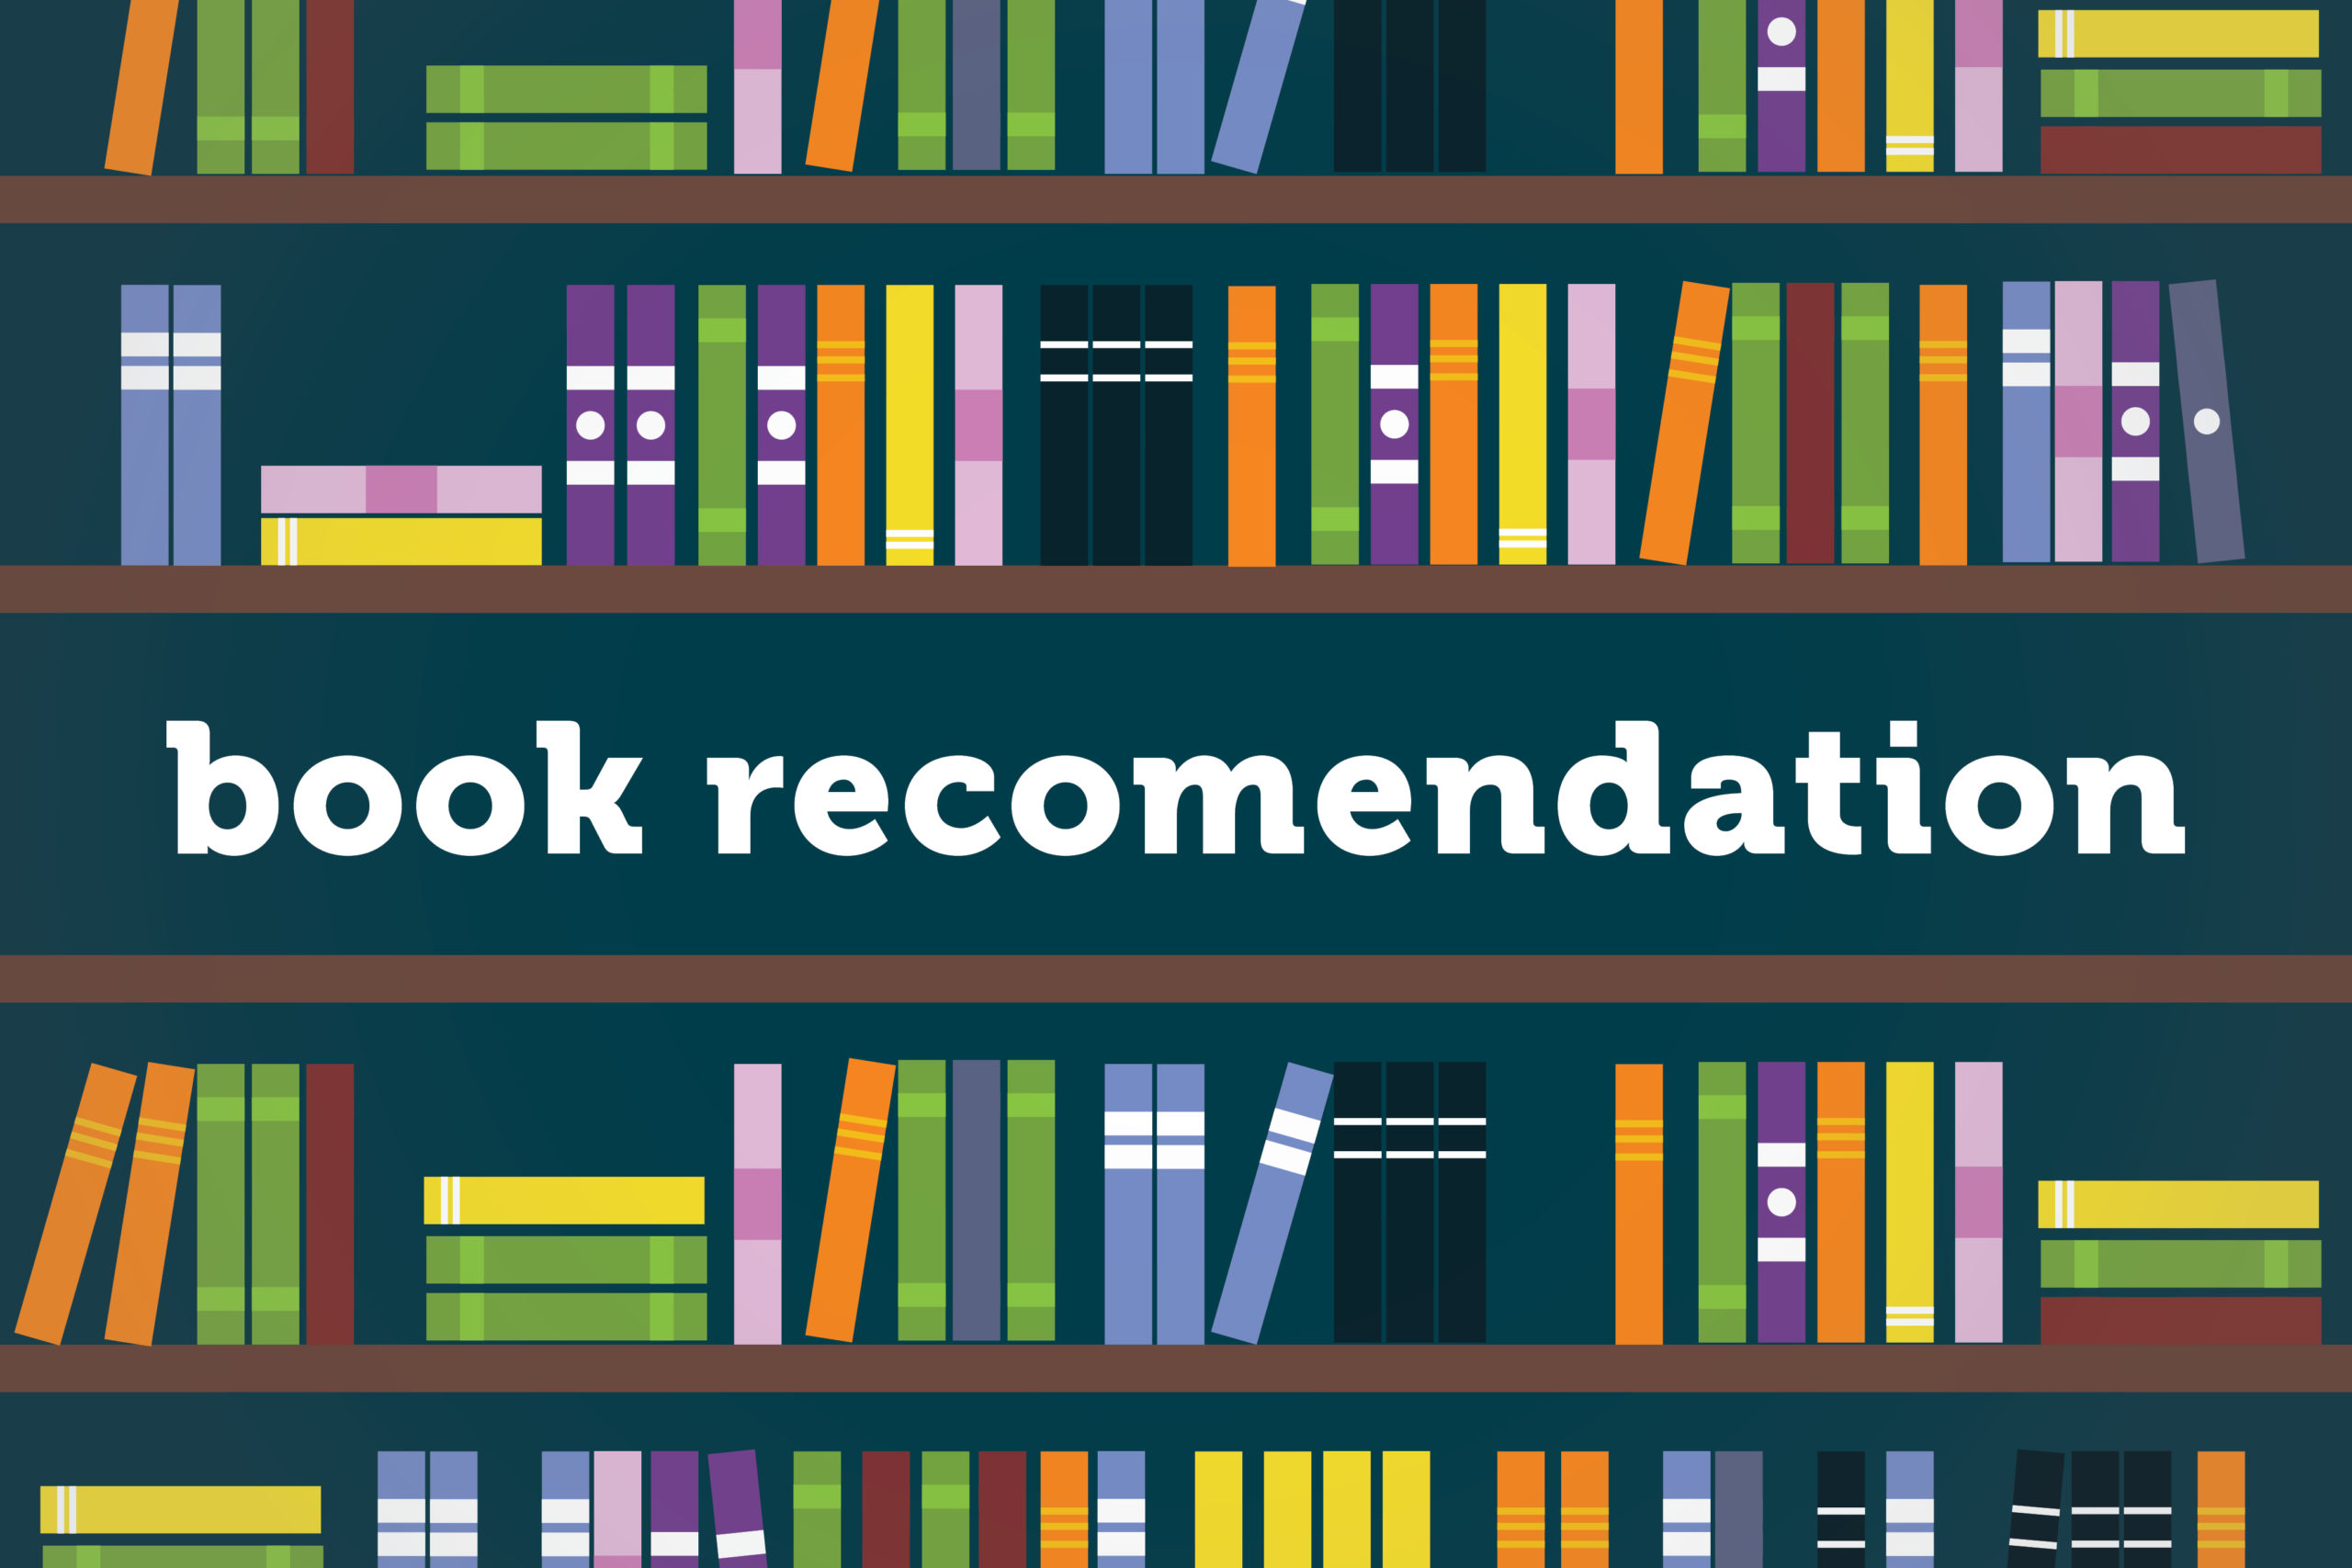

A recommendation system is one of the top applications of data science. Every consumer Internet company requires a recommendation system like Netflix, Youtube, a news feed, etc. What you want to show out of a huge range of items is a recommendation system.
​
## Project of Contents
​
- **1. Introduction to a Recommendation system**
​
- **2. Types of Recommendation system**
​
- **3. Book Recommendation System**
   - Popularity Based Recommender System
   - Content-Based Filtering
   - Collaborative-based filtering
   - Hybrid filtering
​
- **4. Hands-on Recommendation system**
  - Dataset Description
  - Preprocess data
  - Perform EDA
  - Clustering
  - Predictions
  
  
  ## Book Recommendation System 
  
A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. The books recommendation system is used by online websites which provide ebooks like google play books, open library, good Read’s, etc.
​
In this article, we will use the Collaborative based filtering method to build a book recommender system. You can download the dataset from [here](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)
​
​
**Practical Implementation of Recommendation System**
​
Let’s make our hands dirty while trying to implement a Book recommendation system using collaborative filtering.
​
**Dataset Description**  
- we have 3 files in our dataset which is extracted from some books selling websites.
​
1. **Books** – first are about books which contain all the information related to books like an author, title, publication year, etc.
​
2. **Users** – The second file contains registered user’s information like user id, location.
​
3. **ratings** –  Ratings contain information like which user has given how much rating to which book.

So based on all these three files we can build a powerful collaborative filtering model. let’s get started.


In [1]:
# Libarys 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as w
w.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
books = pd.read_csv('/kaggle/input/book-recommendation-dataset/Books.csv')
users = pd.read_csv('/kaggle/input/book-recommendation-dataset/Users.csv')
ratings = pd.read_csv('/kaggle/input/book-recommendation-dataset/Ratings.csv')

In [3]:
# books 
print('shape of books ',books.shape)
print()
books.info()

shape of books  (271360, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
# user 
print('shape of users',users.shape)
print()
users.info()

shape of users (278858, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [5]:
# ratings
print('shape of rating',ratings.shape)
print()
ratings.info()

shape of rating (1149780, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


The dataset is `reliable and can consider as a large dataset`. we have `271360 books data` and total registered `users` on the website are`approximately 278000` and they have given near about `11 lakh rating`. hence we can say that the dataset we have is nice and reliable.

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


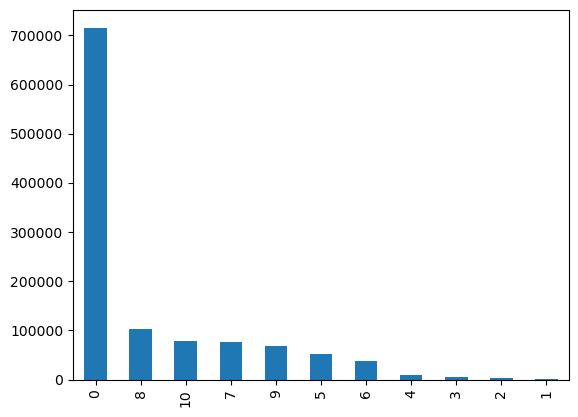

In [10]:
ratings['Book-Rating'].value_counts().plot(kind='bar');

It's common in recommendation systems to have implicit feedback data, where users do not explicitly provide ratings but their actions can be used as an indication of preference. In this case, a `rating of 0 might represent a missing or unknown rating`, which is often treated as "implicit negative feedback." It means that the users who have not provided any rating for a book are not necessarily indicating that they dislike the book; they might simply not have expressed any opinion about it.

In [11]:
# Books 
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
# find the null value in books dataset
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
# drop the missing values
books.dropna(inplace=True)

In [14]:
# dupilcated value
books.duplicated().sum()

0

In [15]:

books['Year-Of-Publication'].value_counts().index.values

array([2002, 2001, 1999, 2000, 1998, 2003, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 2004, 1986, '1999', 1985,
       '2000', '2002', '1998', '2001', 1984, 0, '1997', '1996', 1983,
       '1995', 1982, '1994', '2003', '1993', '1992', '1991', 1981, '1990',
       '1989', '1988', 1980, '1987', '1986', 1979, 1978, '1985', 1977,
       '1984', '2004', '1983', 1976, '1982', '0', '1981', 1975, '1980',
       1974, '1979', 1973, '1978', 1972, '1977', '1976', '1975', 1971,
       '1974', 1970, '1973', 1969, '1972', '1971', 1968, '1970', 1966,
       1967, 1965, 1964, '1969', 1963, 1960, 1961, 1962, 1959, '1968',
       1958, 1957, '1965', 1953, 1955, '1960', 1956, '1961', 1954, '1966',
       '1962', '1967', '1963', '1964', 1951, 2005, 1940, '1959', '1956',
       1920, '1957', '1955', 1952, 1950, '1958', '2005', '1953', 1942,
       1930, 1946, '1952', 1947, 1911, '1911', '1951', '1950', 1949, 1941,
       '1940', '1954', 1923, 1939, 1901, 1929, 1938, 1948, 1943

 the invalid or non-year values like `'0' and '1376'`.

In [16]:
# Step 1: Filter out invalid or non-year values
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()
books = books[valid_years]

# Step 2: Convert the column data to integers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Step 3: Create a new datetime column from the integers representing years
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')

# Drop the old 'Year-Of-Publication' column if you don't need it anymore
books.drop(columns=['Year-Of-Publication'], inplace=True)

# Display the DataFrame to check the new datetime column
books = pd.DataFrame(books)


In [17]:
books.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01


In [18]:
# Step 4: Create a new column with only the year part as integers
books['Year-Of-Publication'] = books['Publication_Date'].dt.year

In [19]:
books.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01,2002.0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01,2001.0
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01,1991.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01,1999.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01,1999.0


In [20]:
books['Year-Of-Publication'].value_counts().index.values


array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [21]:
# this all the invalid data at this time

books = books[~(books['Year-Of-Publication'] == 2037)]

In [22]:
books = books[~(books['Year-Of-Publication'] == 2026)] 

In [23]:
books = books[~(books['Year-Of-Publication'] == 2030)]

In [24]:
books = books[~(books['Year-Of-Publication'] == 2050)]

In [25]:
books = books[~(books['Year-Of-Publication'] == 2038)]

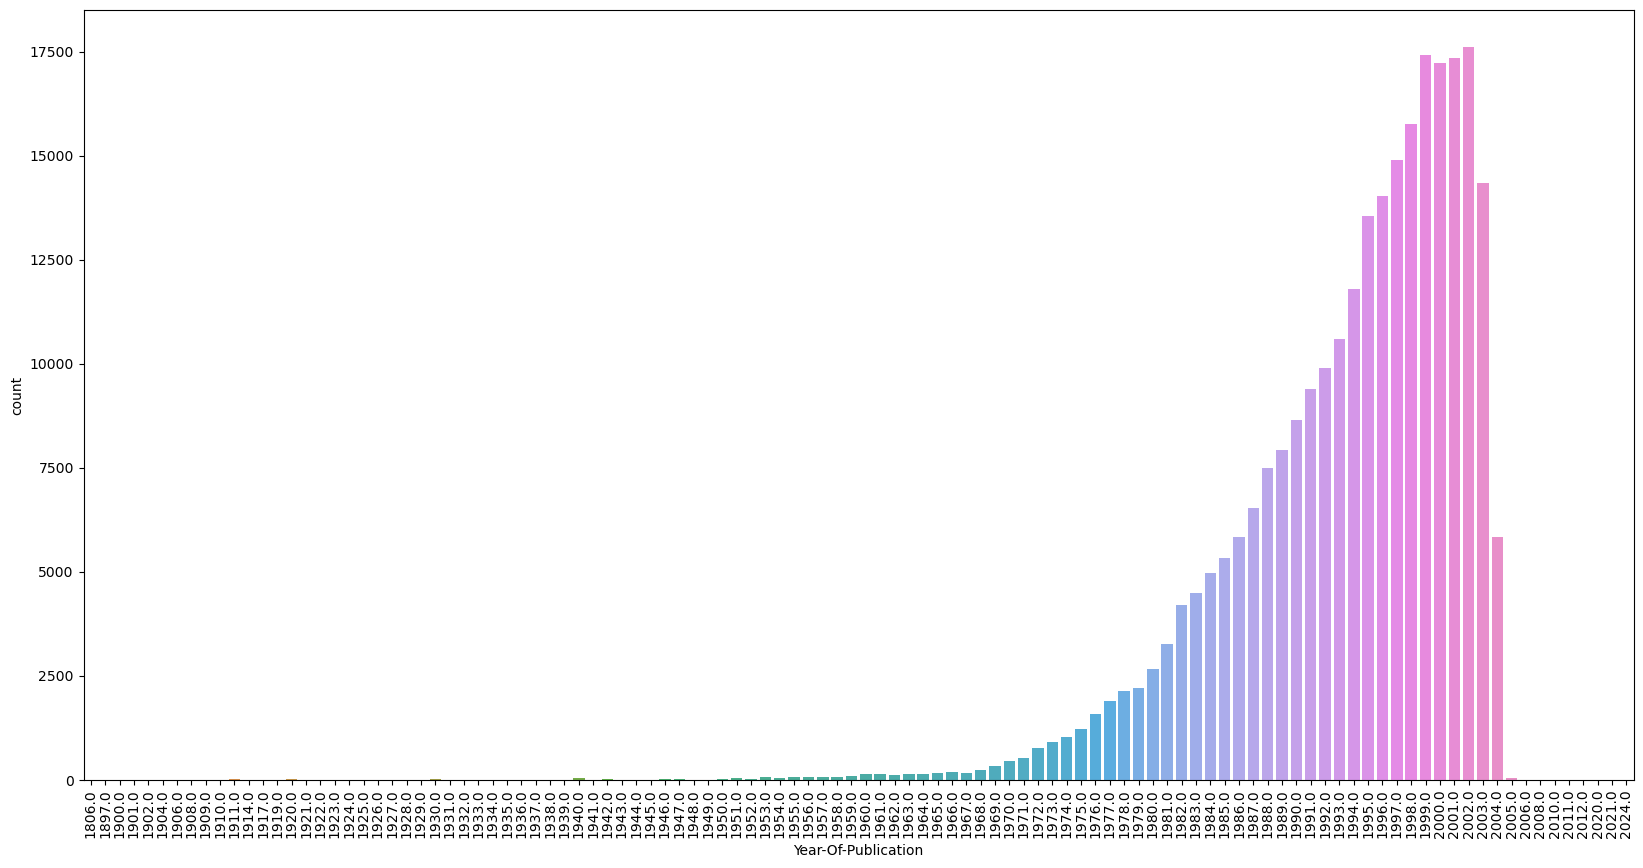

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication']);
plt.xticks(rotation=90)
plt.show()

`Note` : the most books Year-of-Publication is between `1980-2004`

<Axes: >

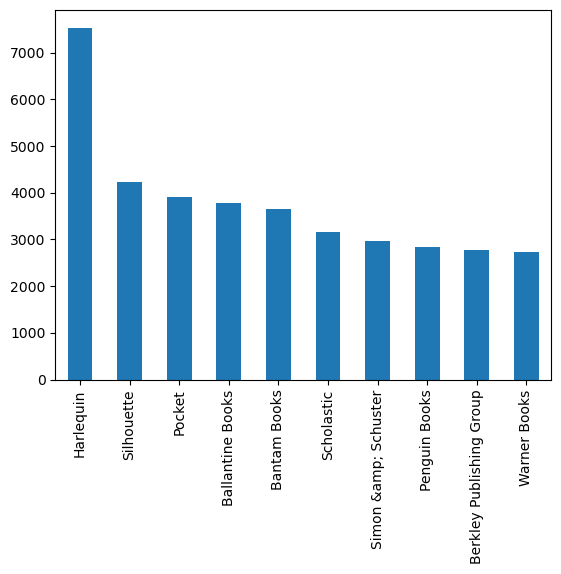

In [27]:
# top 10 Publisher
books['Publisher'].value_counts().head(10).plot(kind='bar')

In [28]:
# users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
# find the null values 
round(100*(users.isnull().sum()/len(users.index)),2)

User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

In [30]:
# remove the age column
users.drop('Age',axis=1,inplace=True)

In [31]:
users.head()

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [32]:
users['Location'] = users['Location'].apply(lambda x:x.split(',')[-1])

<Axes: >

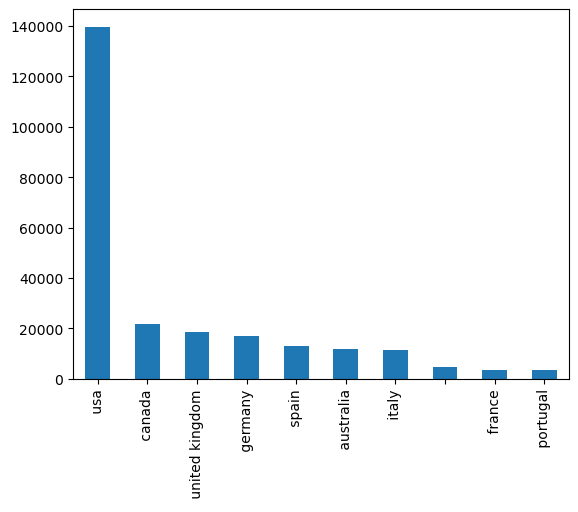

In [33]:
# top 10 user location 
users['Location'].value_counts().head(10).plot(kind='bar')

In [34]:
# ratings 
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
# null values 
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [36]:
# duplicate values
ratings.duplicated().sum()

0

# Popularity based recomender system

**we will display the `Top 50 books` with highest average rating but we will consider only those books who have got minimum 250 votes**

In [37]:
# merge the data ratings and books based on 'ISBN' columns

rating_books_name = ratings.merge(books,on='ISBN')
rating_books_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01,2002.0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01,2002.0
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01,2002.0
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01,2002.0
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01,2002.0


In [38]:
# first of all groupby 'Book-Title' and find the totle number(count) of voting 
numer_rating = rating_books_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
numer_rating.rename(columns={'Book-Rating':'Totle_number_rating'},inplace=True)
numer_rating.head()

,Book-Title,Totle_number_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [39]:
# totle avg-rating
avg_rating = rating_books_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating.rename(columns={'Book-Rating':'Totle_avg_rating'},inplace=True)
avg_rating.head()

,Book-Title,Totle_avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [40]:
# merge the 'avg_rating' and 'number_rating' base on 'Book-Title'

popular_df = numer_rating.merge(avg_rating,on='Book-Title')
popular_df.head()

,Book-Title,Totle_number_rating,Totle_avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


**highest average rating but we will consider only those books who have got minimum 250 votes**

In [41]:
popular_df = popular_df[popular_df['Totle_number_rating'] >= 250].sort_values('Totle_avg_rating',ascending=False).head(50)
popular_df

,Book-Title,Totle_number_rating,Totle_avg_rating
80426,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80414,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80433,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80418,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80406,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191599,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187364,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80437,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211371,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219726,To Kill a Mockingbird,510,4.700000


In [42]:
#  many columns fetch the books dataset to show the website to help 
# merge the 'popular_df' and 'books' dataset 
# Books-Title have many duplicated values 
# drop_duplicated
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author', 'Image-URL-M', 'Totle_number_rating','Totle_avg_rating']]
popular_df

,Book-Title,Book-Author,Image-URL-M,Totle_number_rating,Totle_avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [43]:
# this all the top 50 Books
popular_df

,Book-Title,Book-Author,Image-URL-M,Totle_number_rating,Totle_avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


# Collaborative Filtering Based Recommender System

## Approach to a problem statement

We do not want to find a similarity between users or books. we want to do that If there is user A who has read and liked x and y books, And user B has also liked this two books and now user A has read and liked some z book which is not read by B so we have to recommend z book to user B. This is what collaborative filtering is.

So this is achieved using Matrix Factorization, we will create one matrix where columns will be users and indexes will be books and value will be rating. Like we have to create a Pivot table.

## A big flaw with a problem statement in the dataset

If we take all the books and all the users for modeling, Don’t you think will it create a problem? So what we have to do is we have to decrease the number of users and books because we cannot consider a user who has only registered on the website or has only read one or two books. On such a user, we cannot rely to recommend books to others because we have to extract knowledge from data. So what we will limit this number and we will take a user who has rated at least 200 books and also we will limit books and we will take only those books which have received at least 50 ratings from a user.

pivot table

  
        user1   user2    user3   user4   user5   user6   user7  ...........user_n
book1   

book2

book3

book4

book5                                 
                                  ----------------------------------------------                 # Ratings #--------------------------------------


book6


book7
.
.
.
.
.
.
.

book_n 

## Exploratory Data Analysis (EDA)
So let’s get with analysis and prepare the dataset as we discussed for modeling. let us see how many users have given ratings and extract those users who have given more than 200 ratings.

In [44]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

### Step-1) Extract users and ratings of more than 200

when you run the above code we can see only 105283 peoples have given a rating among 278000. Now we will extract the user ids who have given more than 200 ratings and when we will have user ids we will extract the ratings of only this user id from the rating dataframe.

In [45]:
x = ratings['User-ID'].value_counts() > 200
y = x[x].index

In [46]:
print(y.shape)

(899,)


Only 899 users have the more then 200 ratings

In [47]:
ratings = ratings[ratings['User-ID'].isin(y)]

### step-2) Merge ratings with books

So 900 users are there who have given 5.2 lakh rating and this we want. Now we will merge ratings with books on basis of ISBN so that we will get the rating of each user on each book id and the user who has not rated that book id the value will be zero.

In [48]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0


### step-3) Extract books that have received more than 50 ratings.

Now dataframe size has decreased and we have 4.8 lakh because when we merge the dataframe, all the book id-data we were not having. Now we will count the rating of each book so we will group data based on title and aggregate based on rating.

In [49]:
number_rating = rating_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
number_rating.rename(columns= {'Book-Rating':'number_of_ratings'}, inplace=True)
number_rating.head()

,Book-Title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [50]:
final_rating = rating_with_books.merge(number_rating, on='Book-Title')
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82


In [51]:
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['User-ID','Book-Title'], inplace=True)

In [52]:
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01,1994.0,82


we have to drop duplicate values because if the same user has rated the same book multiple times so it will create a problem. Finally, we have a dataset with that user who has rated more than 200 books and books that received more than 50 ratings. the shape of the final dataframe is 59850 rows and 8 columns.

### Step-4) Create Pivot Table
As we discussed above we will create a pivot table where columns will be user ids, the index will be book title and the value is ratings. And the user id who has not rated any book will have value as NAN so impute it with zero.



In [53]:
book_pivot = final_rating.pivot_table(columns='User-ID', index='Book-Title', values="Book-Rating")
book_pivot.fillna(0, inplace=True)

In [54]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


742 Totle Books and 888 Users

We can see the more than 11 users have removed out because their ratings were on those books which do not receive more than 50 ratings so they are moved out of the picture

### Modeling

Now every book has became a vector in 888 dimensional space and we have to find similar vectors. so, now we will calculate the euclidian distance of each vector with other vectors and on the basis of that distance we will get to know which book is simila.

using  **cosine_similarity Distance**  to find the all recommended Books

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(book_pivot)

In [57]:
similarity_scores

array([[1.        , 0.07624004, 0.        , ..., 0.09387814, 0.04480685,
        0.03286937],
       [0.07624004, 1.        , 0.27421749, ..., 0.07424784, 0.16365457,
        0.15050832],
       [0.        , 0.27421749, 1.        , ..., 0.04732923, 0.05195619,
        0.11178963],
       ...,
       [0.09387814, 0.07424784, 0.04732923, ..., 1.        , 0.07085128,
        0.03898126],
       [0.04480685, 0.16365457, 0.05195619, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.03286937, 0.15050832, 0.11178963, ..., 0.03898126, 0.13208788,
        1.        ]])

In [58]:
similarity_scores.shape

(742, 742)

(742,742) means the each books distance very movies



In [59]:
# this is the first books distance each books similarity 
similarity_scores[0]

array([1.        , 0.07624004, 0.        , 0.        , 0.07311041,
       0.03592254, 0.        , 0.0720444 , 0.09844858, 0.        ,
       0.        , 0.        , 0.06357987, 0.        , 0.06052731,
       0.0184244 , 0.0631735 , 0.09360361, 0.04554309, 0.08528621,
       0.02292759, 0.        , 0.08992788, 0.        , 0.12558027,
       0.07016405, 0.05554746, 0.06322522, 0.        , 0.04925827,
       0.10706361, 0.0571246 , 0.10238571, 0.06000764, 0.05101252,
       0.        , 0.        , 0.06576001, 0.03915011, 0.        ,
       0.        , 0.09079097, 0.07599253, 0.        , 0.        ,
       0.05612309, 0.10585073, 0.        , 0.03106666, 0.07276544,
       0.06663565, 0.07310003, 0.02892988, 0.04970874, 0.26347625,
       0.10084817, 0.08304715, 0.10808221, 0.10651024, 0.06877653,
       0.03882237, 0.        , 0.        , 0.03512102, 0.        ,
       0.05326136, 0.0338294 , 0.17941454, 0.        , 0.        ,
       0.        , 0.03714664, 0.09521457, 0.12490485, 0.     

In [60]:
def recommend(book_name):
    # index fetch
    index = np.where(book_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [61]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]